In [1]:
## This version excludes CONTINUOUS Variables and the RFD variables AND _wHICH VARIABLES 3/27/2024 and con_max_consultorder_time/day and drg name
## 4/4/2024 Added QUINTILE variables
## 4/8/2024 Added QUINTILE varables by service
## 4/9/2024 Added more consult and imaging variables (e.g. ad,it order to consult order, admit order to imaging read)
## 4/11/2024 Added QUINTILE variables by service for the additional variables
# 06/12/2024: Added gender, added imaging_order_before_consult_order and consult_order_before_imaging order variables, excluded 290 patients in 2022, dropped raw race/insurance categories
# 06/14/2024: Removed quintiles
# 06/20/2024: Set seed for reproducibility
# 06/22/2024: Added sample size for validation
# 07/05/2024: Collapsed Cardiology into Medicine
# 07/08/2024: Added labels
# 07/25/2024: Removed duplicated patients from master file
# 08/01/2024: Changed XGBoost hyperparmeter tuning to Haipeng's code and using only one model, streamlined so all shap plots in one jupyter notebook
# 08/07/2024: Added continuous features, add discretizer and removed variables >=99% missing 
# 08/15/2024: Added viz_right_service_hf_yn variable

In [2]:
import pandas as pd
import numpy as np
import os
import warnings
from los_functions_v2 import *
warnings.filterwarnings('ignore')

In [3]:
#all hospitalized patients 
df_all = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/master_los.csv', index_col=[0])
df_all["viz_service_collapsed"] = df_all["viz_service_collapsed"].apply(map_med)

#discharged home
df_home = df_all[df_all["viz_disp_collapsed"] == "Home"].copy()

#hf patients
df_all = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/master_los.csv', index_col=[0])
df_hf = df_all[df_all["viz_drg"]=="heart failure & shock w mcc"].copy()

In [4]:
# Dictionary of data frames with their names
dfs = {
    "df_all": df_all,
    "df_home": df_home,
    "df_hf":df_hf
}

fp_simple = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los_simple.xlsx'
fp_complex = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los.xlsx'
fp_continuous = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los_continuous.xlsx'
output_folder = '/gpfs/milgram/project/rtaylor/imc33/LOS/output'

### Simple (without quintiles)

Running on df_all
df_filt shape: (12771, 912)
X train_preprocessed shape: (10246, 317)
X val preprocessed shape: (2525, 317)
y train prolonged LOS proportion: 0.4388053874682803
y val prolonged LOS proportion: 0.4304950495049505
X_train_selected shape: (10246, 211)
X_val_selected shape: (2525, 211)
100%|██████████| 20/20 [00:14<00:00,  1.34trial/s, best loss: -0.7576565940685571]
XGB Best parameters for 211 features: {'colsample_by_tree': 0.6565004189886763, 'learning_rate': 0.29938202228220967, 'max_depth': 7, 'n_estimators': 33, 'num_leaves': 47, 'reg_lambda': 0.5464002904734102}


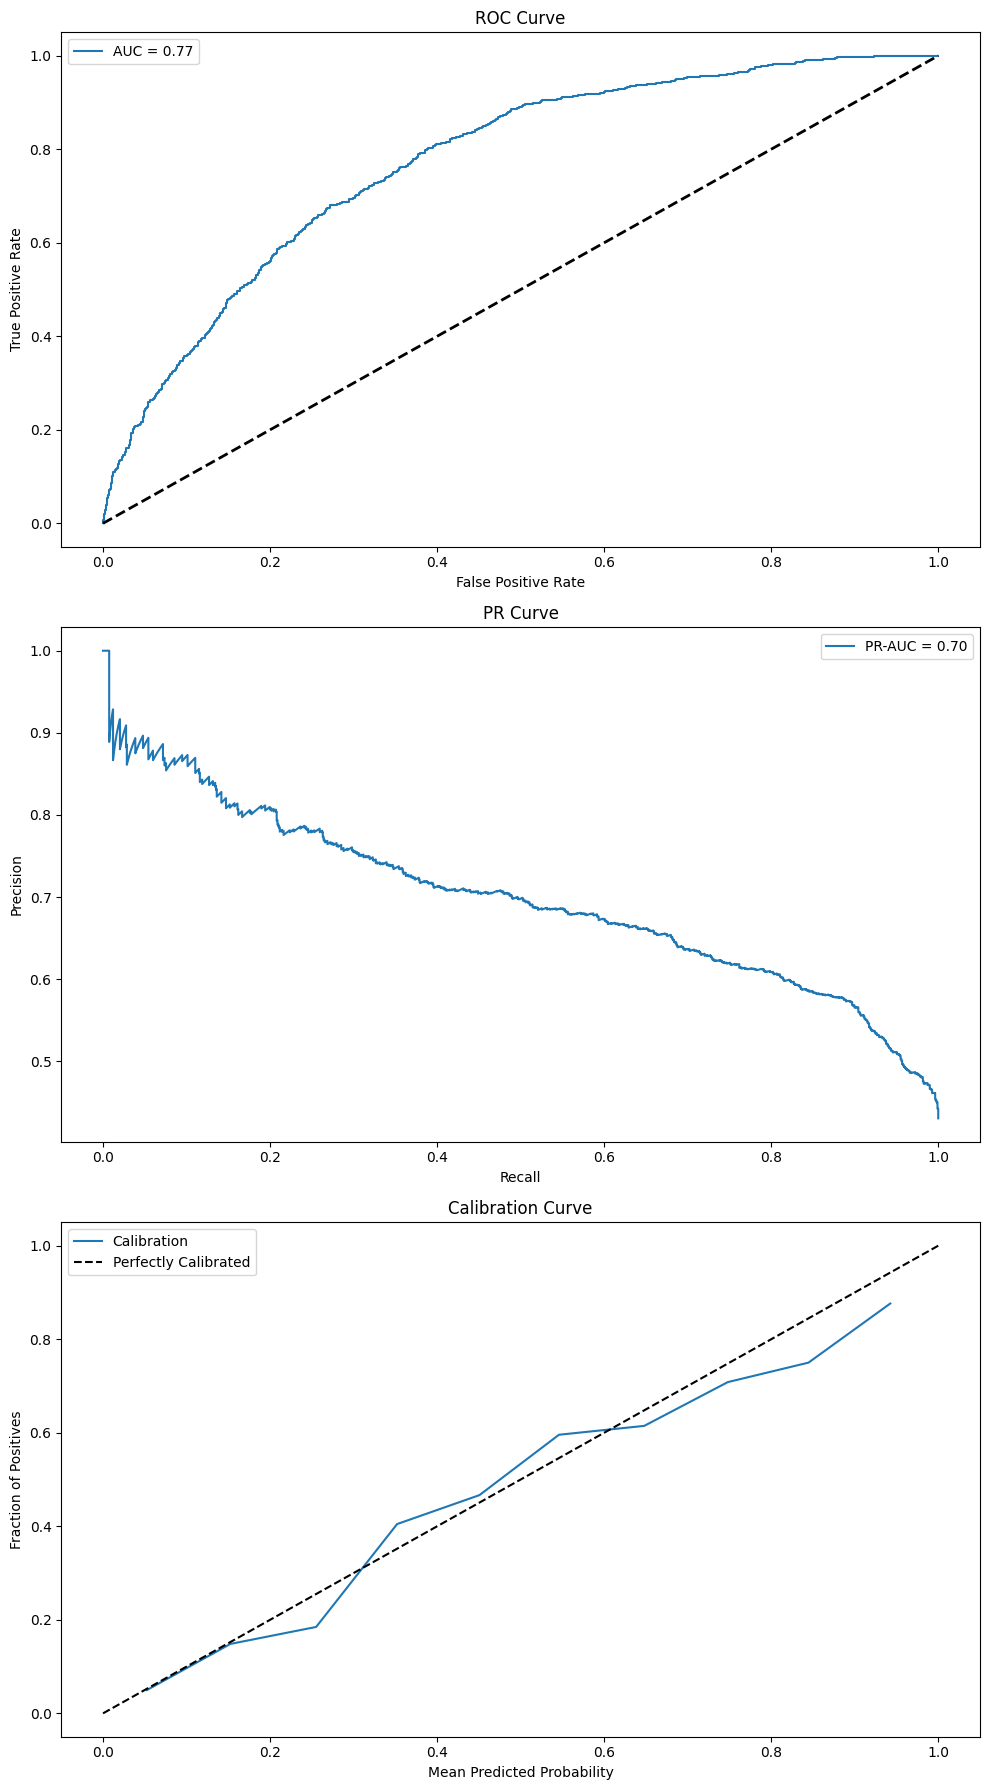

Specificity : 0.7747
Sensitivity : 0.6044
Accuracy : 0.7014
Precision : 0.6697
F1 score : 0.6354
Of 1438 people who did not have a prolonged LOS, 1114 (77.47%) were correctly classified.
Of 1087 people who did have a prolonged LOS, 657 (60.44%) were correctly classified.
summary_consult_count_all
summary_first_rfd_status_No
viz_disp_collapsed_Home
img_count_any
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
viz_drg_Respiratory infections & inflammations w mcc
viz_age
thro_ed_arrival_time_Afternoon
viz_service_collapsed_Surgical Services
img_count_us
summary_last_rfd_status_No
summary_last_edd_doc_day_Mon
con_service_gastroenterology_count
thro_last_bed_assigned_time_Morning
summary_last_edd_doc_time_Morning
census_daily_ed_count
summary_consult_count_unique_services
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
viz_insurance_Medicare
viz_admission_day_Fri
summary_first_edd_doc_day_Thu
summary_first_rfd_day_Mon
viz_ynhhs_sg2_service_Digestive Health - Medical


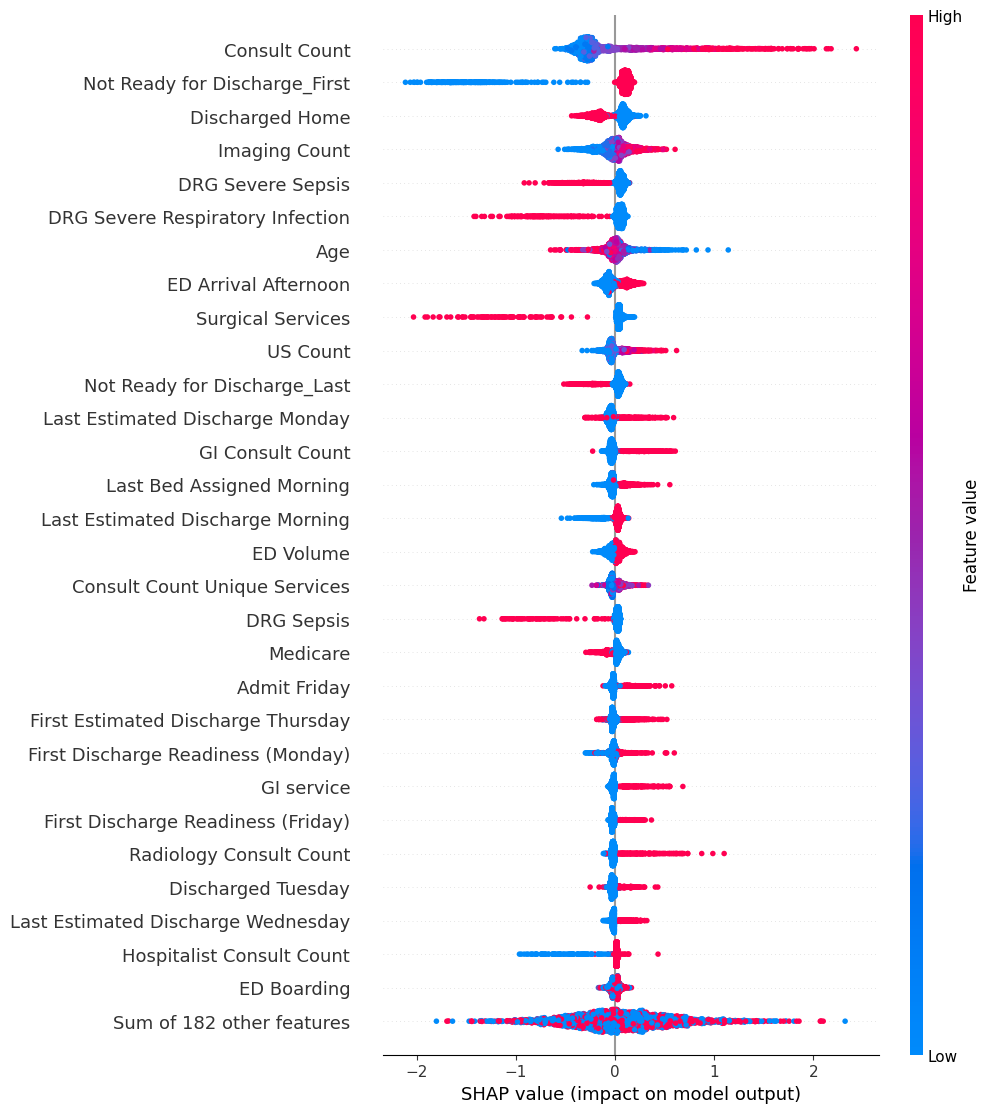

Plots for df_all_simple_2024-08-15 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_home
df_filt shape: (4749, 912)
X train_preprocessed shape: (3814, 305)
X val preprocessed shape: (935, 305)
y train prolonged LOS proportion: 0.3618248557944415
y val prolonged LOS proportion: 0.32192513368983955
X_train_selected shape: (3814, 201)
X_val_selected shape: (935, 201)
100%|██████████| 20/20 [00:09<00:00,  2.12trial/s, best loss: -0.7994085992469074]
XGB Best parameters for 201 features: {'colsample_by_tree': 0.6565004189886763, 'learning_rate': 0.29938202228220967, 'max_depth': 7, 'n_estimators': 33, 'num_leaves': 47, 'reg_lambda': 0.5464002904734102}


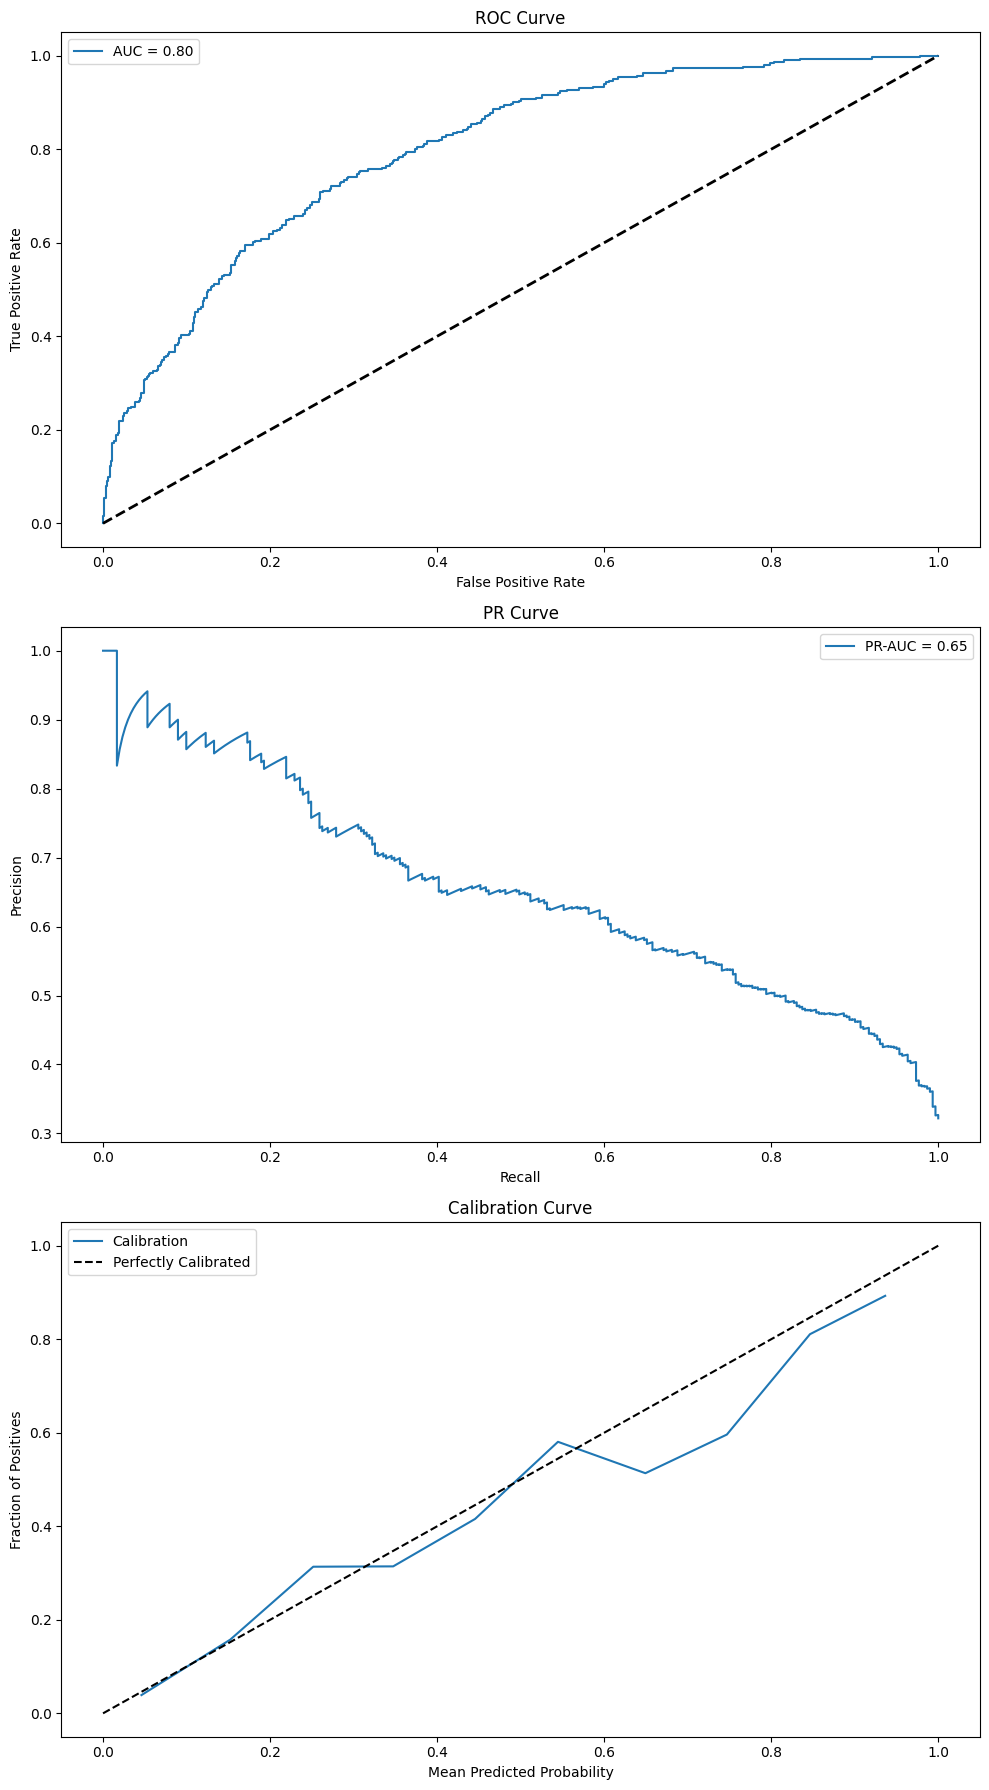

Specificity : 0.8533
Sensitivity : 0.5316
Accuracy : 0.7497
Precision : 0.6324
F1 score : 0.5776
Of 634 people who did not have a prolonged LOS, 541 (85.33%) were correctly classified.
Of 301 people who did have a prolonged LOS, 160 (53.16%) were correctly classified.
summary_first_rfd_status_No
summary_consult_count_all
thro_ed_arrival_time_Afternoon
viz_age
census_daily_ed_count
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
img_count_any
summary_first_rfd_day_Mon
census_daily_inpt_count
img_count_us
viz_drg_Respiratory infections & inflammations w mcc
summary_first_edd_doc_day_Thu
viz_ynhhs_sg2_service_Digestive Health - Medical
summary_last_edd_doc_day_Mon
con_service_radiology_count
summary_last_rfd_status_No
summary_last_edd_doc_time_Morning
con_max_consult_note_creation_time_Morning
viz_discharged_day_Sun
viz_gender_Female
thro_ed_departure_day_Fri
viz_discharged_day_Sat
con_service_gastroenterology_count
v

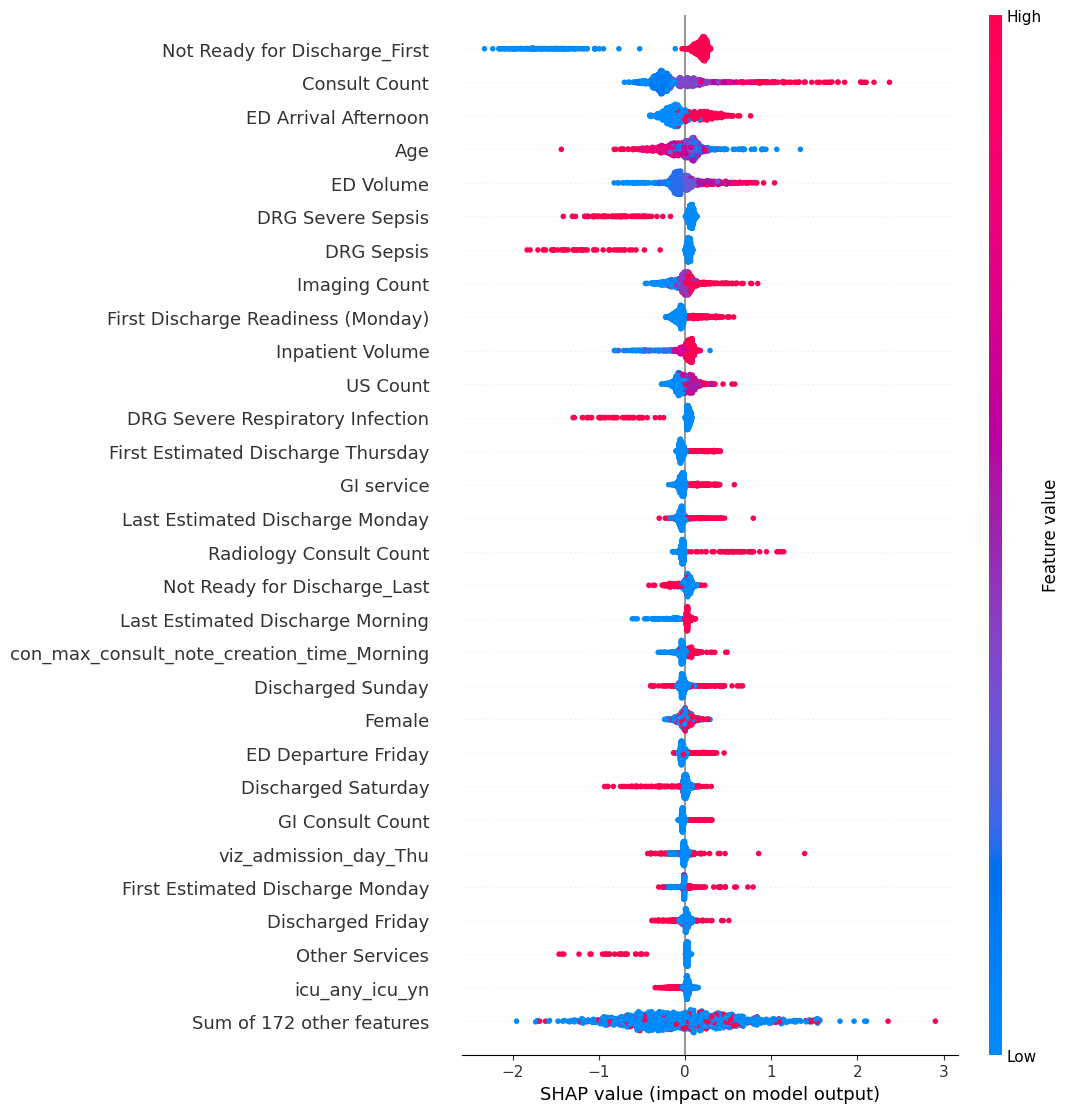

Plots for df_home_simple_2024-08-15 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_hf
df_filt shape: (1351, 912)
X train_preprocessed shape: (1091, 286)
X val preprocessed shape: (260, 286)
y train prolonged LOS proportion: 0.44912923923006415
y val prolonged LOS proportion: 0.4576923076923077
X_train_selected shape: (1091, 174)
X_val_selected shape: (260, 174)
100%|██████████| 20/20 [00:06<00:00,  3.16trial/s, best loss: -0.7035940574576939]
XGB Best parameters for 174 features: {'colsample_by_tree': 0.8099656297384077, 'learning_rate': 0.17383589279439982, 'max_depth': 7, 'n_estimators': 20, 'num_leaves': 8, 'reg_lambda': 0.48490437823738375}


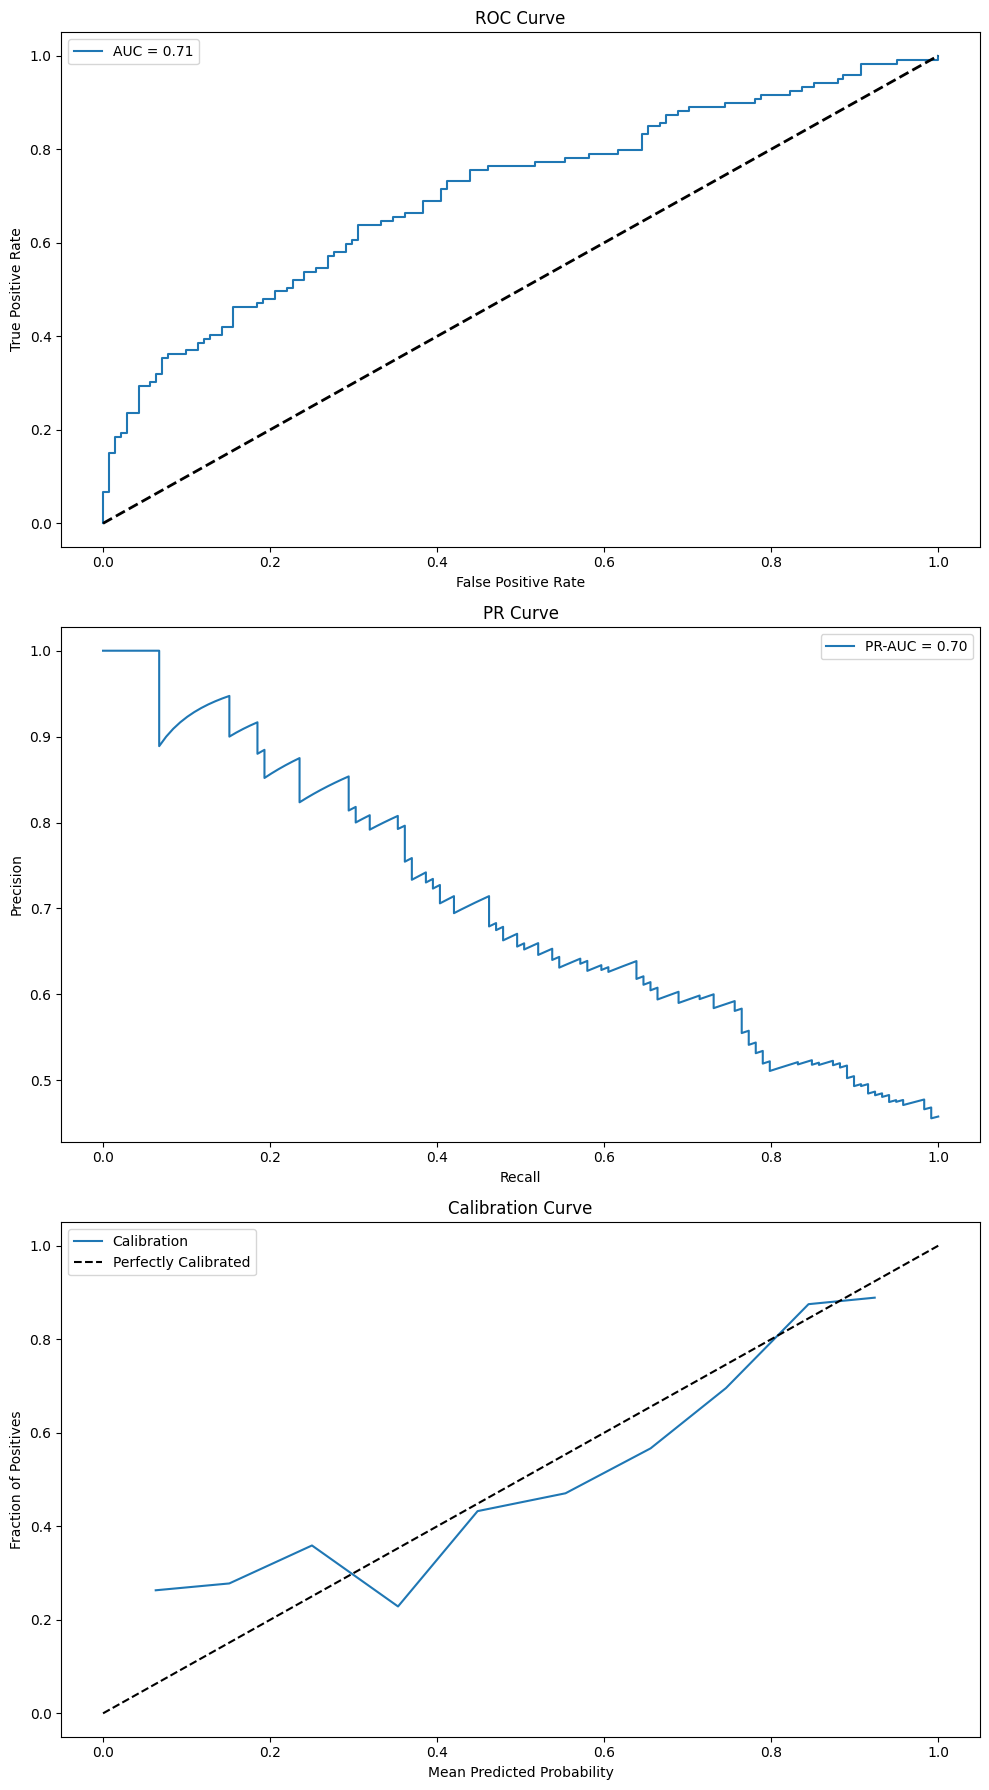

Specificity : 0.7092
Sensitivity : 0.5966
Accuracy : 0.6577
Precision : 0.6339
F1 score : 0.6147
Of 141 people who did not have a prolonged LOS, 100 (70.92%) were correctly classified.
Of 119 people who did have a prolonged LOS, 71 (59.66%) were correctly classified.
summary_first_rfd_status_No
census_daily_ed_count
summary_consult_count_all
img_count_any
viz_gender_Female
img_count_us
summary_consult_count_unique_services
con_signer_ym_provider_count
viz_age
thro_ed_arrival_time_Afternoon
summary_first_rfd_day_Mon
viz_disp_collapsed_Home
thro_admit_or_obs_order_day_Sun
thro_first_bed_assigned_time_Night
thro_boarding_yn
summary_last_edd_day_Fri
summary_first_edd_day_Wed
con_service_palliative_count
img_count_mr
summary_last_rfd_day_Wed
con_max_consult_note_creation_day_Mon
viz_admission_day_Mon
summary_first_rfd_status_Yes, no barriers
summary_last_rfd_day_Tue
viz_discharged_day_Sat
thro_first_bed_assigned_time_Morning
viz_discharged_day_Tue
thro_ed_departure_day_Sat
thro_first_bed_as

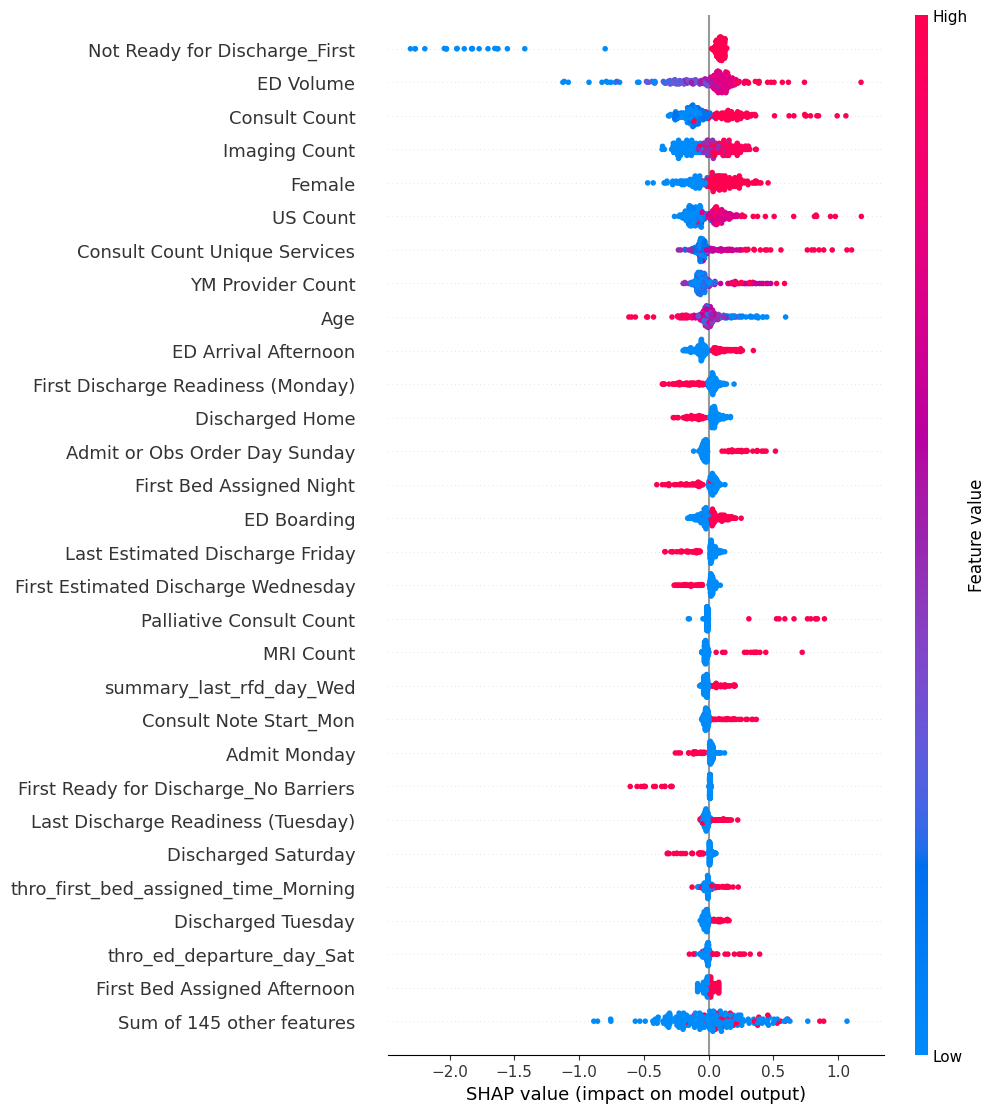

Plots for df_hf_simple_2024-08-15 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output


In [5]:
# Run the function for each data frame and save the plots
for df_name, df_filt in dfs.items():
    print(f"Running on {df_name}")
    run_xgb_and_plot(df_filt, fp_simple, output_folder, df_name, suffix="simple")

### With Quintiles

Running on df_all
df_filt shape: (12771, 912)
X train_preprocessed shape: (10246, 1559)
X val preprocessed shape: (2525, 1559)
y train prolonged LOS proportion: 0.4388053874682803
y val prolonged LOS proportion: 0.4304950495049505
X_train_selected shape: (10246, 613)
X_val_selected shape: (2525, 613)
100%|██████████| 20/20 [00:34<00:00,  1.72s/trial, best loss: -0.8001514687817382]
XGB Best parameters for 613 features: {'colsample_by_tree': 0.6425936901635491, 'learning_rate': 0.13914887471932533, 'max_depth': 14, 'n_estimators': 29, 'num_leaves': 35, 'reg_lambda': 0.8474645439246081}


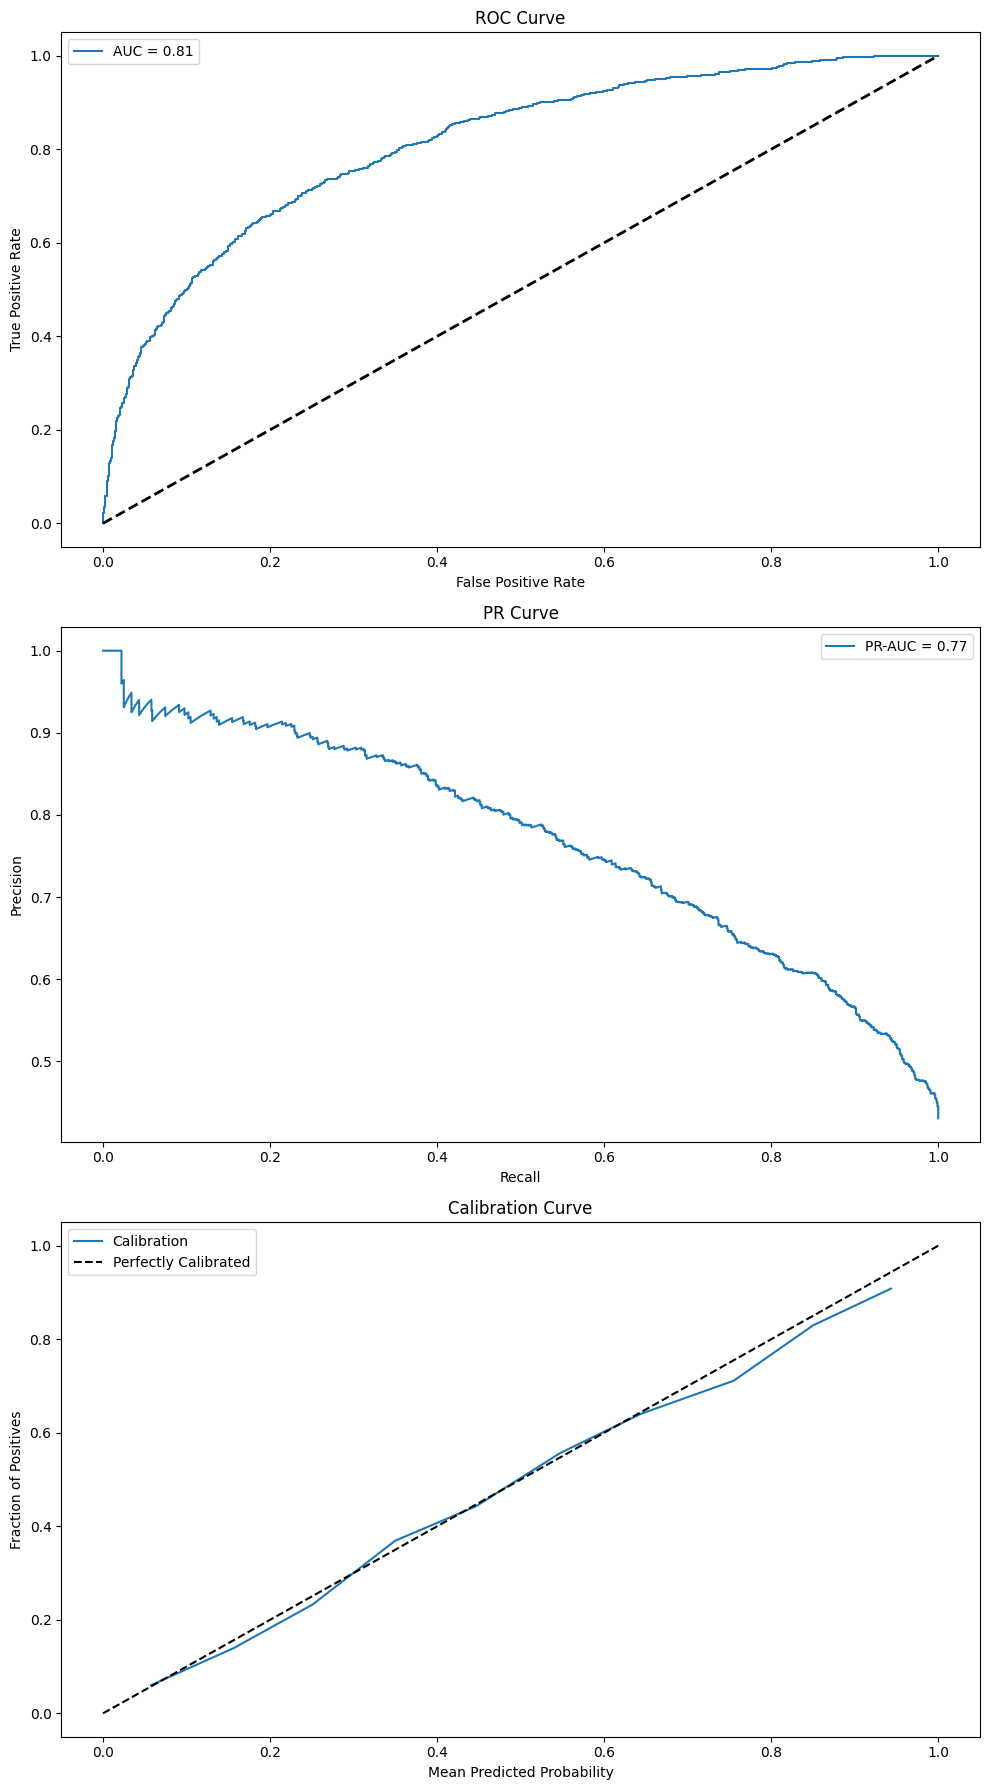

Specificity : 0.8282
Sensitivity : 0.6256
Accuracy : 0.7410
Precision : 0.7335
F1 score : 0.6753
Of 1438 people who did not have a prolonged LOS, 1191 (82.82%) were correctly classified.
Of 1087 people who did have a prolonged LOS, 680 (62.56%) were correctly classified.
img_max_admit_order_to_imaging_order_any_quintile_5.0
summary_first_rfd_status_No
summary_consult_count_all
con_max_admit_order_to_consult_order_any_quintile_5.0
viz_drg_Respiratory infections & inflammations w mcc
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
img_avg_admit_order_to_imaging_order_any_quintile_5.0
viz_service_collapsed_Surgical Services
thro_ed_arrival_time_Afternoon
viz_age
summary_last_rfd_status_No
con_avg_admit_order_to_consult_completion_any_quintile_5.0
viz_disp_collapsed_Home
con_max_admit_order_to_consult_completion_any_quintile_4.0
con_avg_admit_order_to_consult_order_any_quintile_5.0
con_max_admit_order_to_consult_order_any_quintile_4.0
img_max_admit_order_to_imaging_order_any_qui

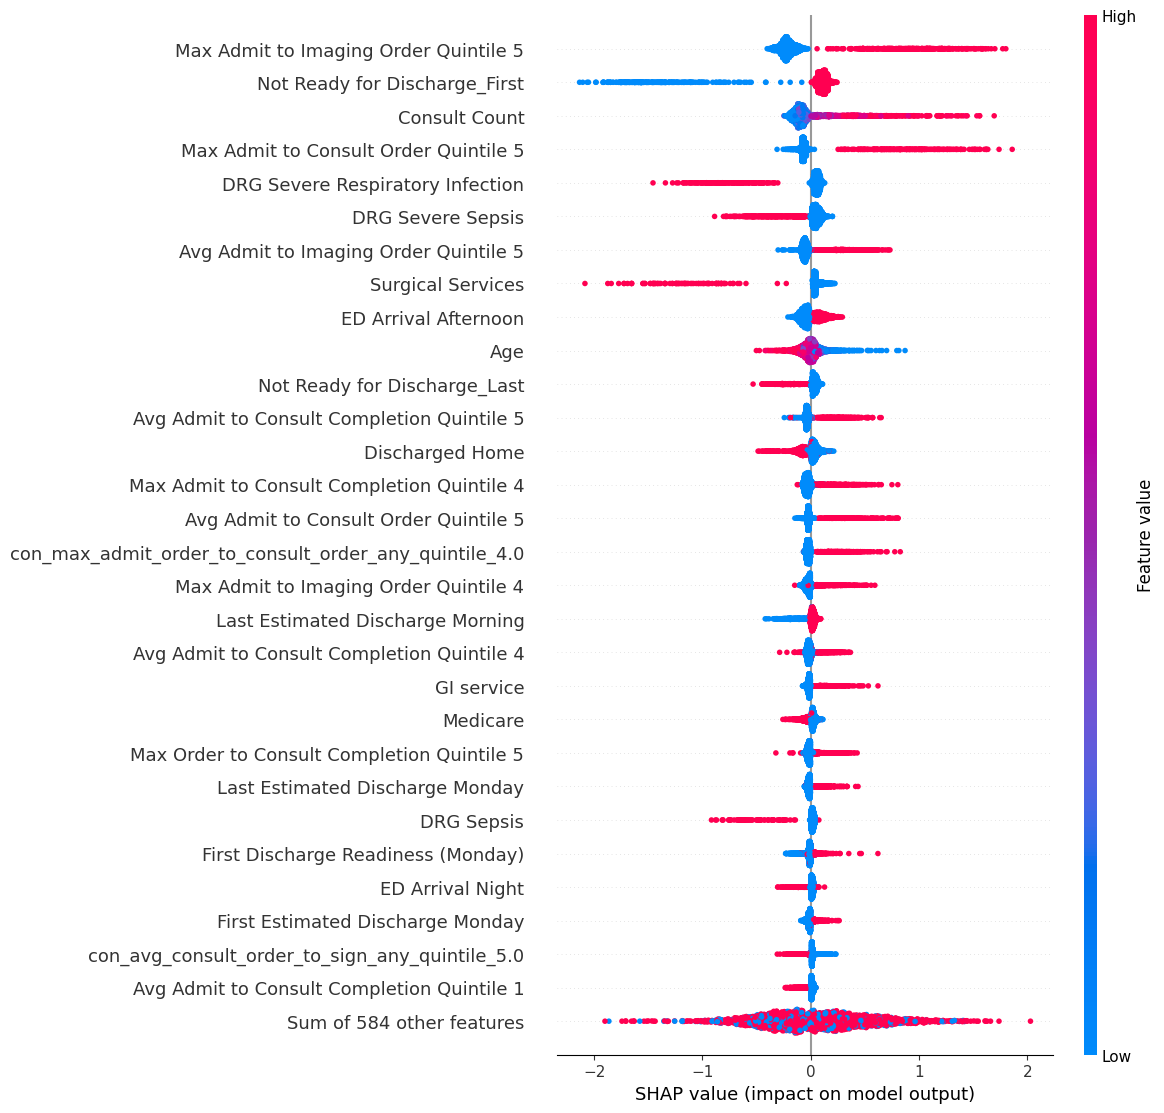

Plots for df_all_with_quintiles_2024-08-15 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_home
df_filt shape: (4749, 912)
X train_preprocessed shape: (3814, 1355)
X val preprocessed shape: (935, 1355)
y train prolonged LOS proportion: 0.3618248557944415
y val prolonged LOS proportion: 0.32192513368983955
X_train_selected shape: (3814, 520)
X_val_selected shape: (935, 520)
100%|██████████| 20/20 [00:19<00:00,  1.00trial/s, best loss: -0.8145764224216215]
XGB Best parameters for 520 features: {'colsample_by_tree': 0.6565004189886763, 'learning_rate': 0.29938202228220967, 'max_depth': 7, 'n_estimators': 33, 'num_leaves': 47, 'reg_lambda': 0.5464002904734102}


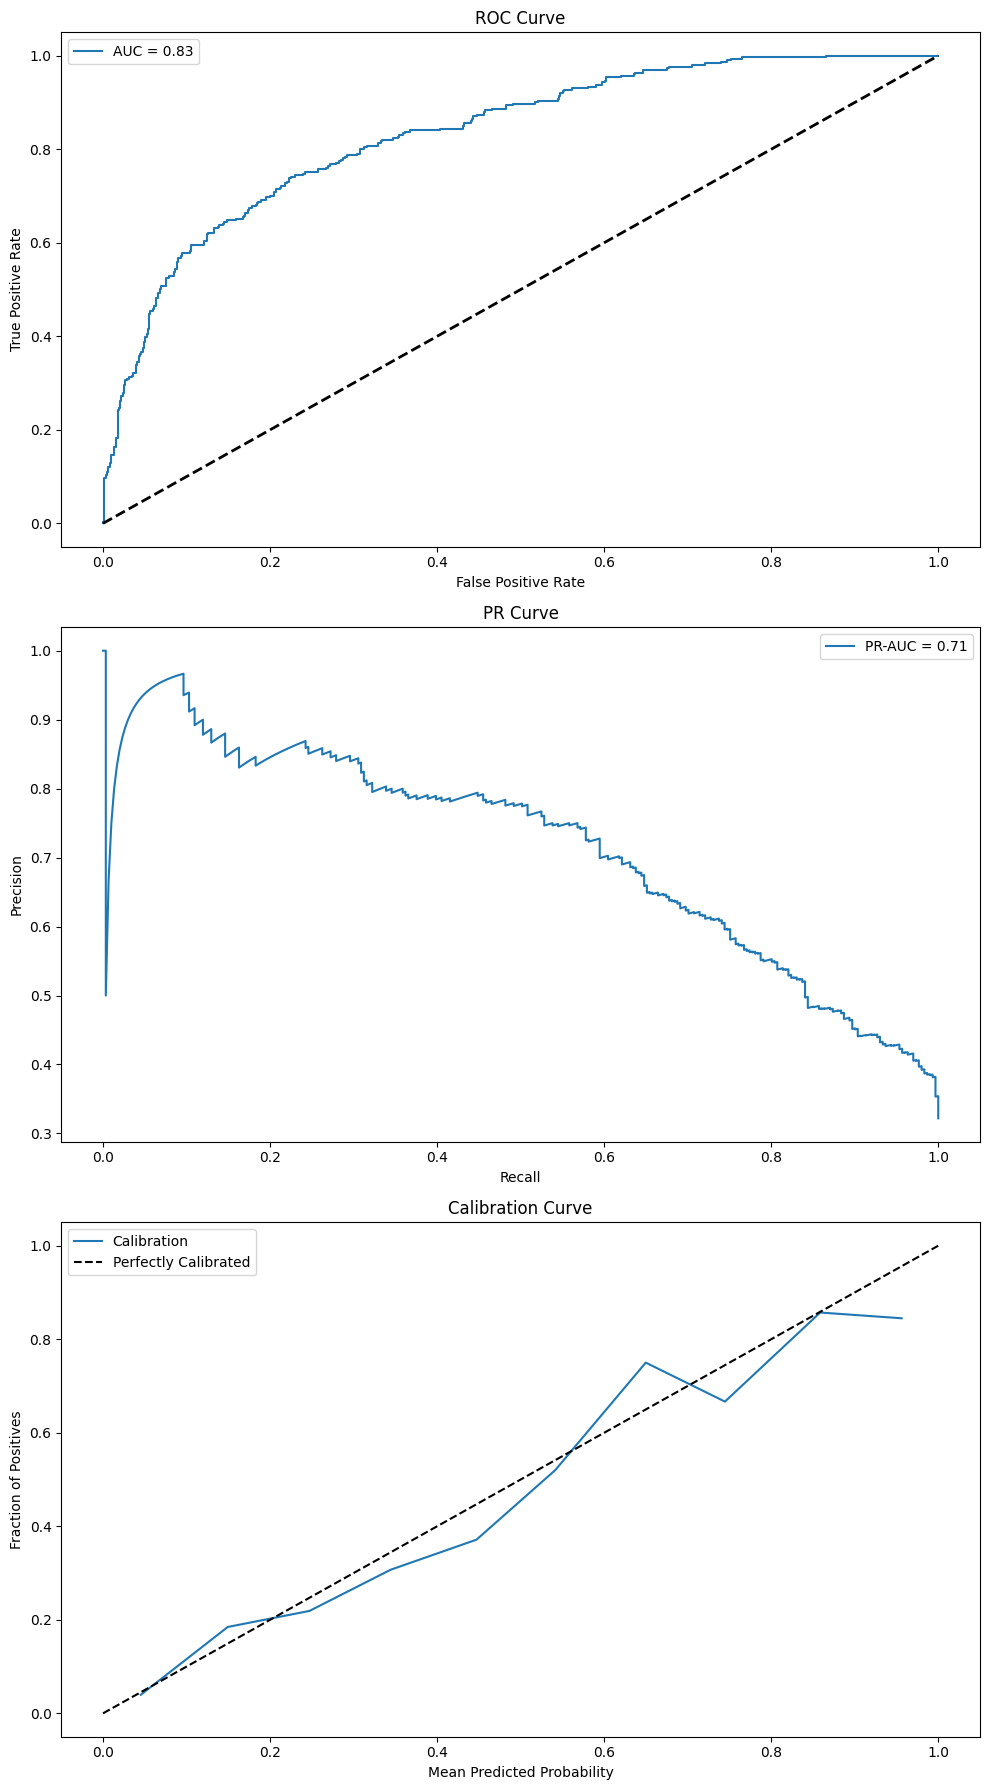

Specificity : 0.8943
Sensitivity : 0.5847
Accuracy : 0.7947
Precision : 0.7243
F1 score : 0.6471
Of 634 people who did not have a prolonged LOS, 567 (89.43%) were correctly classified.
Of 301 people who did have a prolonged LOS, 176 (58.47%) were correctly classified.
summary_first_rfd_status_No
img_max_admit_order_to_imaging_order_any_quintile_5.0
summary_consult_count_all
viz_age
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
img_max_admit_order_to_imaging_order_any_quintile_4.0
thro_ed_arrival_time_Afternoon
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
summary_first_rfd_day_Mon
census_daily_ed_count
viz_drg_Respiratory infections & inflammations w mcc
summary_last_rfd_day_Tue
summary_last_edd_doc_day_Mon
summary_last_rfd_status_No
viz_ynhhs_sg2_service_Rare
census_daily_inpt_count
summary_last_edd_doc_time_Morning
thro_ed_arrival_time_Night
summary_first_edd_doc_day_Mon
viz_ynhhs_sg2_service_Digestive Health - Medical
con_avg_admit_order_to_consult_order_

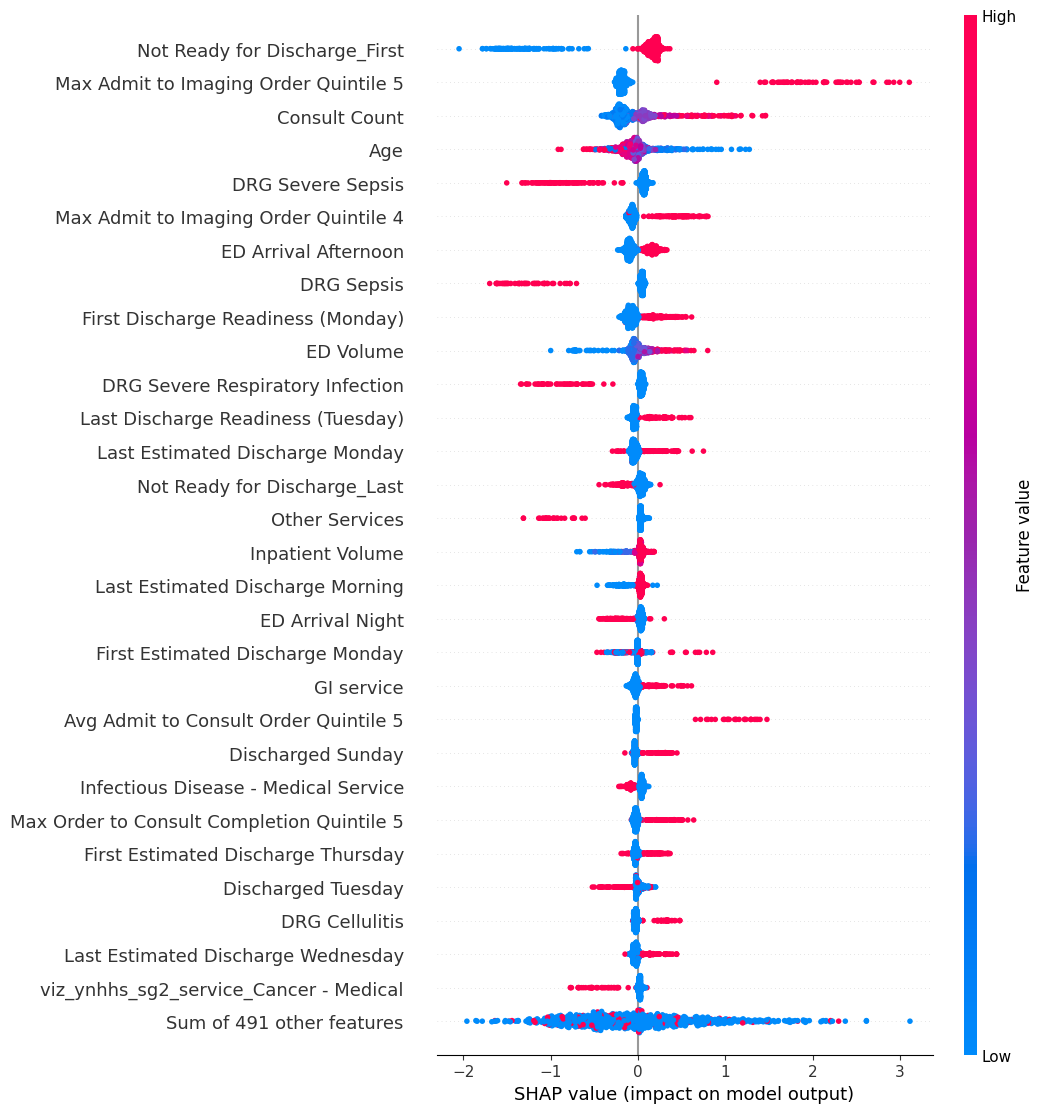

Plots for df_home_with_quintiles_2024-08-15 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_hf
df_filt shape: (1351, 912)
X train_preprocessed shape: (1091, 1319)
X val preprocessed shape: (260, 1319)
y train prolonged LOS proportion: 0.44912923923006415
y val prolonged LOS proportion: 0.4576923076923077
X_train_selected shape: (1091, 448)
X_val_selected shape: (260, 448)
100%|██████████| 20/20 [00:12<00:00,  1.58trial/s, best loss: -0.7599128577050656]
XGB Best parameters for 448 features: {'colsample_by_tree': 0.6425936901635491, 'learning_rate': 0.13914887471932533, 'max_depth': 14, 'n_estimators': 29, 'num_leaves': 35, 'reg_lambda': 0.8474645439246081}


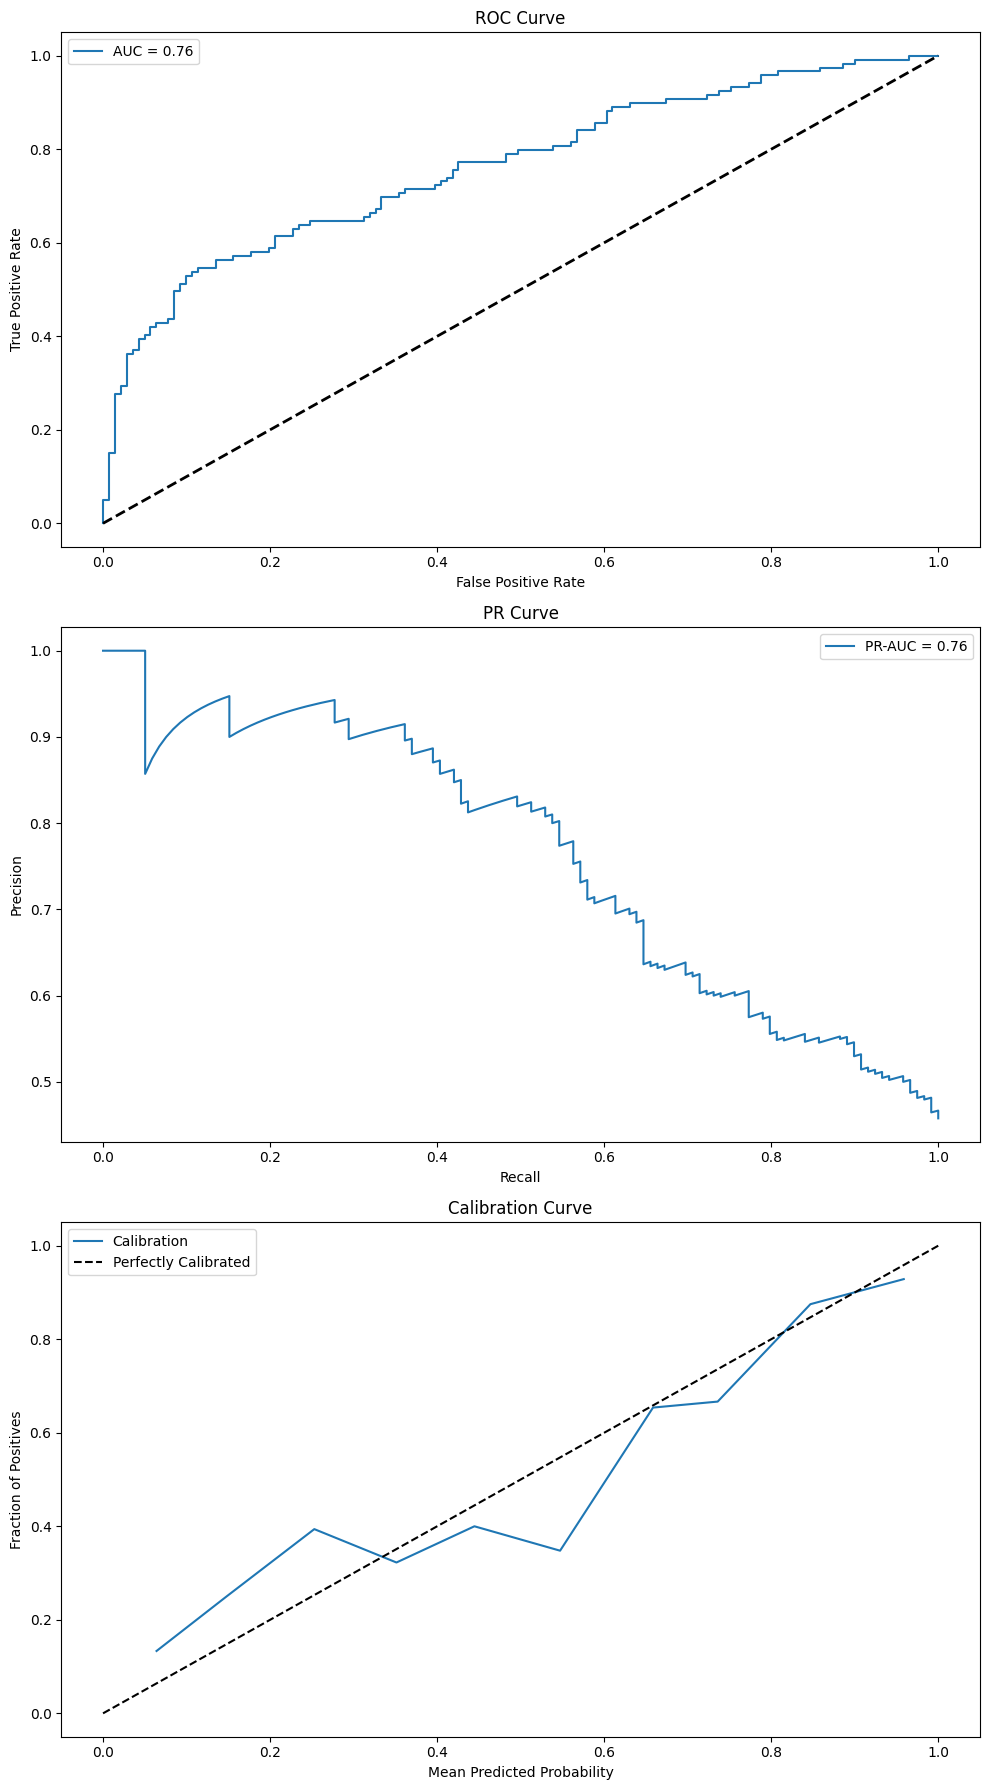

Specificity : 0.7730
Sensitivity : 0.6134
Accuracy : 0.7000
Precision : 0.6952
F1 score : 0.6518
Of 141 people who did not have a prolonged LOS, 109 (77.30%) were correctly classified.
Of 119 people who did have a prolonged LOS, 73 (61.34%) were correctly classified.
img_max_admit_order_to_imaging_order_any_quintile_5.0
con_avg_admit_order_to_consult_order_any_quintile_5.0
census_daily_ed_count
summary_first_rfd_status_No
viz_age
thro_ed_arrival_time_Afternoon
summary_first_rfd_status_Yes, no barriers
con_avg_admit_order_to_consult_completion_cardiology_quintile_1.0
con_max_admit_order_to_consult_order_any_quintile_5.0
con_avg_admit_order_to_consult_order_any_quintile_4.0
viz_gender_Female
img_avg_admit_order_to_imaging_order_any_quintile_5.0
thro_first_bed_assigned_time_Night
viz_discharged_day_Tue
thro_admit_or_obs_order_day_Sun
thro_ed_arrival_time_Night
img_count_us
viz_admission_day_Mon
img_max_order_to_completion_any_quintile_5.0
con_max_consult_order_to_sign_cardiology_quintile_

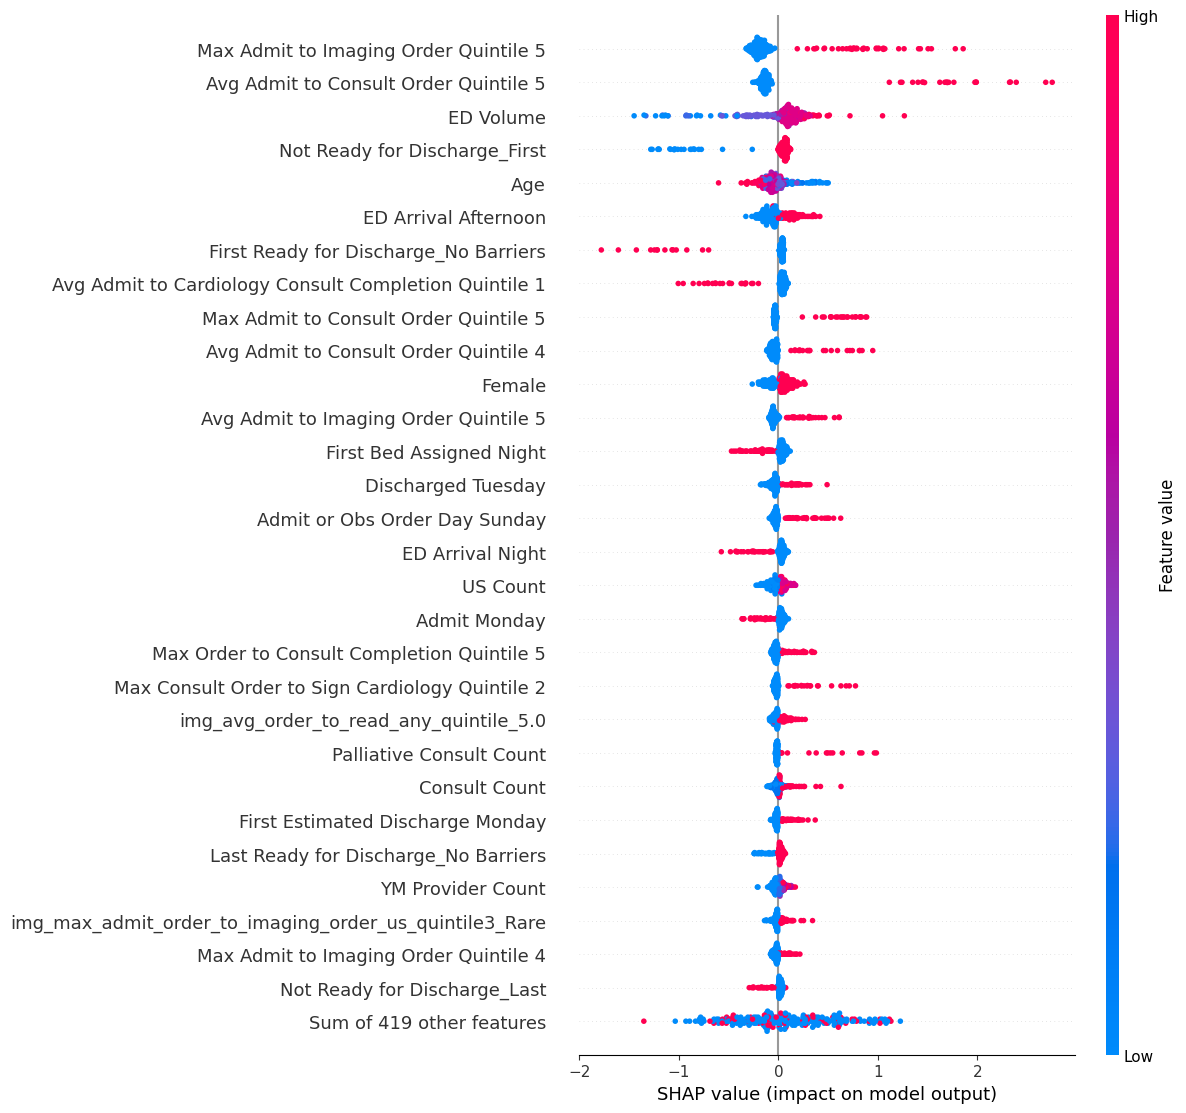

Plots for df_hf_with_quintiles_2024-08-15 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output


In [6]:
# Run the function for each data frame and save the plots
for df_name, df_filt in dfs.items():
    print(f"Running on {df_name}")
    run_xgb_and_plot(df_filt, fp_complex, output_folder, df_name, suffix="with_quintiles")

### With Continuous Features

Running on df_all
df_filt shape: (12771, 912)
X train_preprocessed shape: (10246, 852)
X val preprocessed shape: (2525, 852)
y train prolonged LOS proportion: 0.4388053874682803
y val prolonged LOS proportion: 0.4304950495049505
X_train_selected shape: (10246, 369)
X_val_selected shape: (2525, 369)
100%|██████████| 20/20 [00:55<00:00,  2.80s/trial, best loss: -0.8876612826919874]
XGB Best parameters for 369 features: {'colsample_by_tree': 0.8099656297384077, 'learning_rate': 0.17383589279439982, 'max_depth': 7, 'n_estimators': 20, 'num_leaves': 8, 'reg_lambda': 0.48490437823738375}


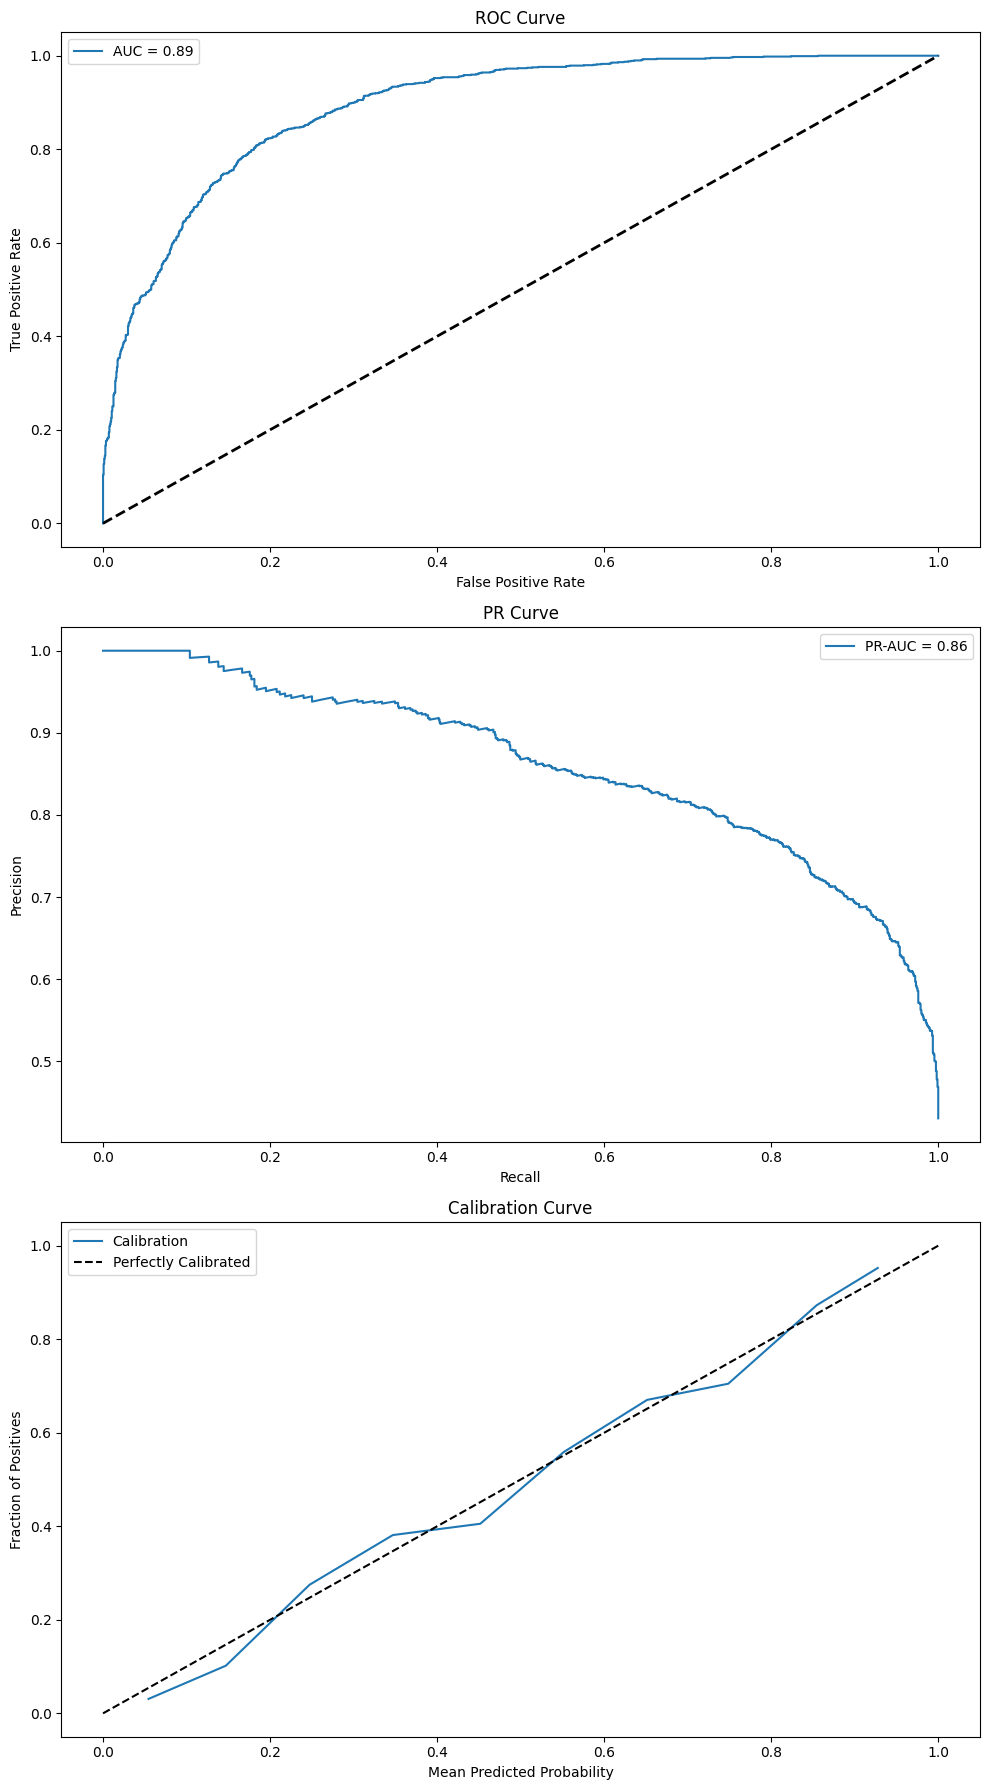

Specificity : 0.8261
Sensitivity : 0.7912
Accuracy : 0.8111
Precision : 0.7748
F1 score : 0.7829
Of 1438 people who did not have a prolonged LOS, 1188 (82.61%) were correctly classified.
Of 1087 people who did have a prolonged LOS, 860 (79.12%) were correctly classified.
summary_first_rfd_to_discharge_hrs
summary_total_hrs_nmr
summary_first_edd_to_discharge_hrs
viz_age
viz_drg_Respiratory infections & inflammations w mcc
viz_drg_Rare
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
thro_admit_order_to_ed_dept_hrs
viz_disp_collapsed_Home
viz_service_collapsed_Surgical Services
thro_ed_arrival_time_Afternoon
thro_door_to_admit_order_hrs
icu_any_icu_yn
viz_drg_Esophagitis, gastroent & misc digest disorders w/o mcc
viz_service_collapsed_Medicine
viz_ynhhs_sg2_service_Digestive Health - Medical
rfd_last_nmr_to_discharge_hrs
viz_admission_day_Fri
img_avg_admit_order_to_imaging_order_any_hrs
summary_first_rfd_day_Mon
img_avg_admit_order_to_imaging_read_any_hrs
viz_drg_Cellulitis w/o

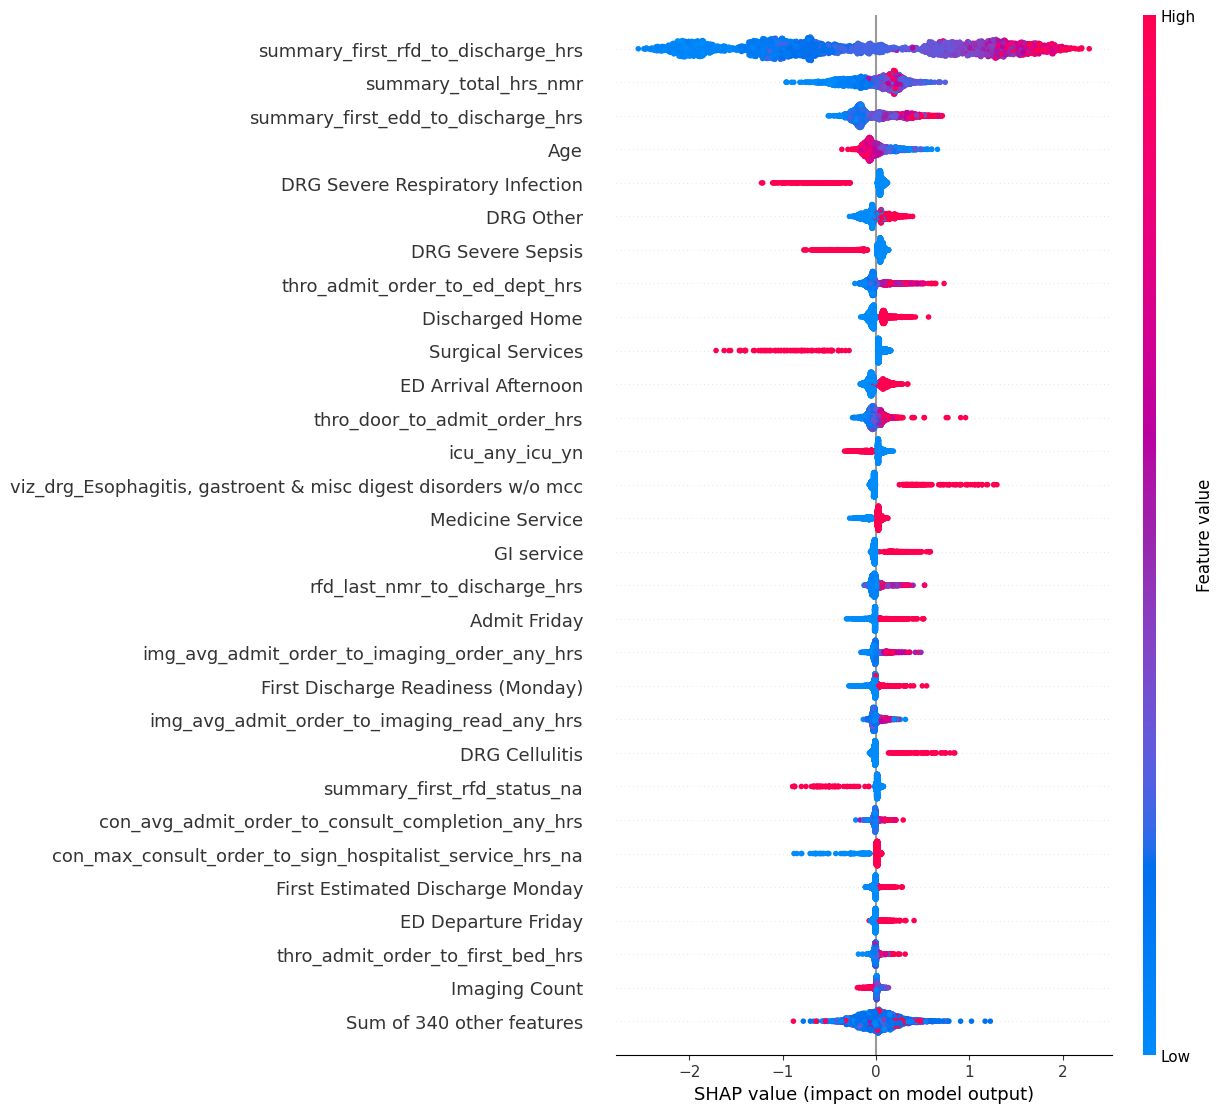

Plots for df_all_continuous_2024-08-15 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_home
df_filt shape: (4749, 912)
X train_preprocessed shape: (3814, 772)
X val preprocessed shape: (935, 772)
y train prolonged LOS proportion: 0.3618248557944415
y val prolonged LOS proportion: 0.32192513368983955
X_train_selected shape: (3814, 336)
X_val_selected shape: (935, 336)
100%|██████████| 20/20 [00:26<00:00,  1.34s/trial, best loss: -0.8973066839882634]
XGB Best parameters for 336 features: {'colsample_by_tree': 0.8099656297384077, 'learning_rate': 0.17383589279439982, 'max_depth': 7, 'n_estimators': 20, 'num_leaves': 8, 'reg_lambda': 0.48490437823738375}


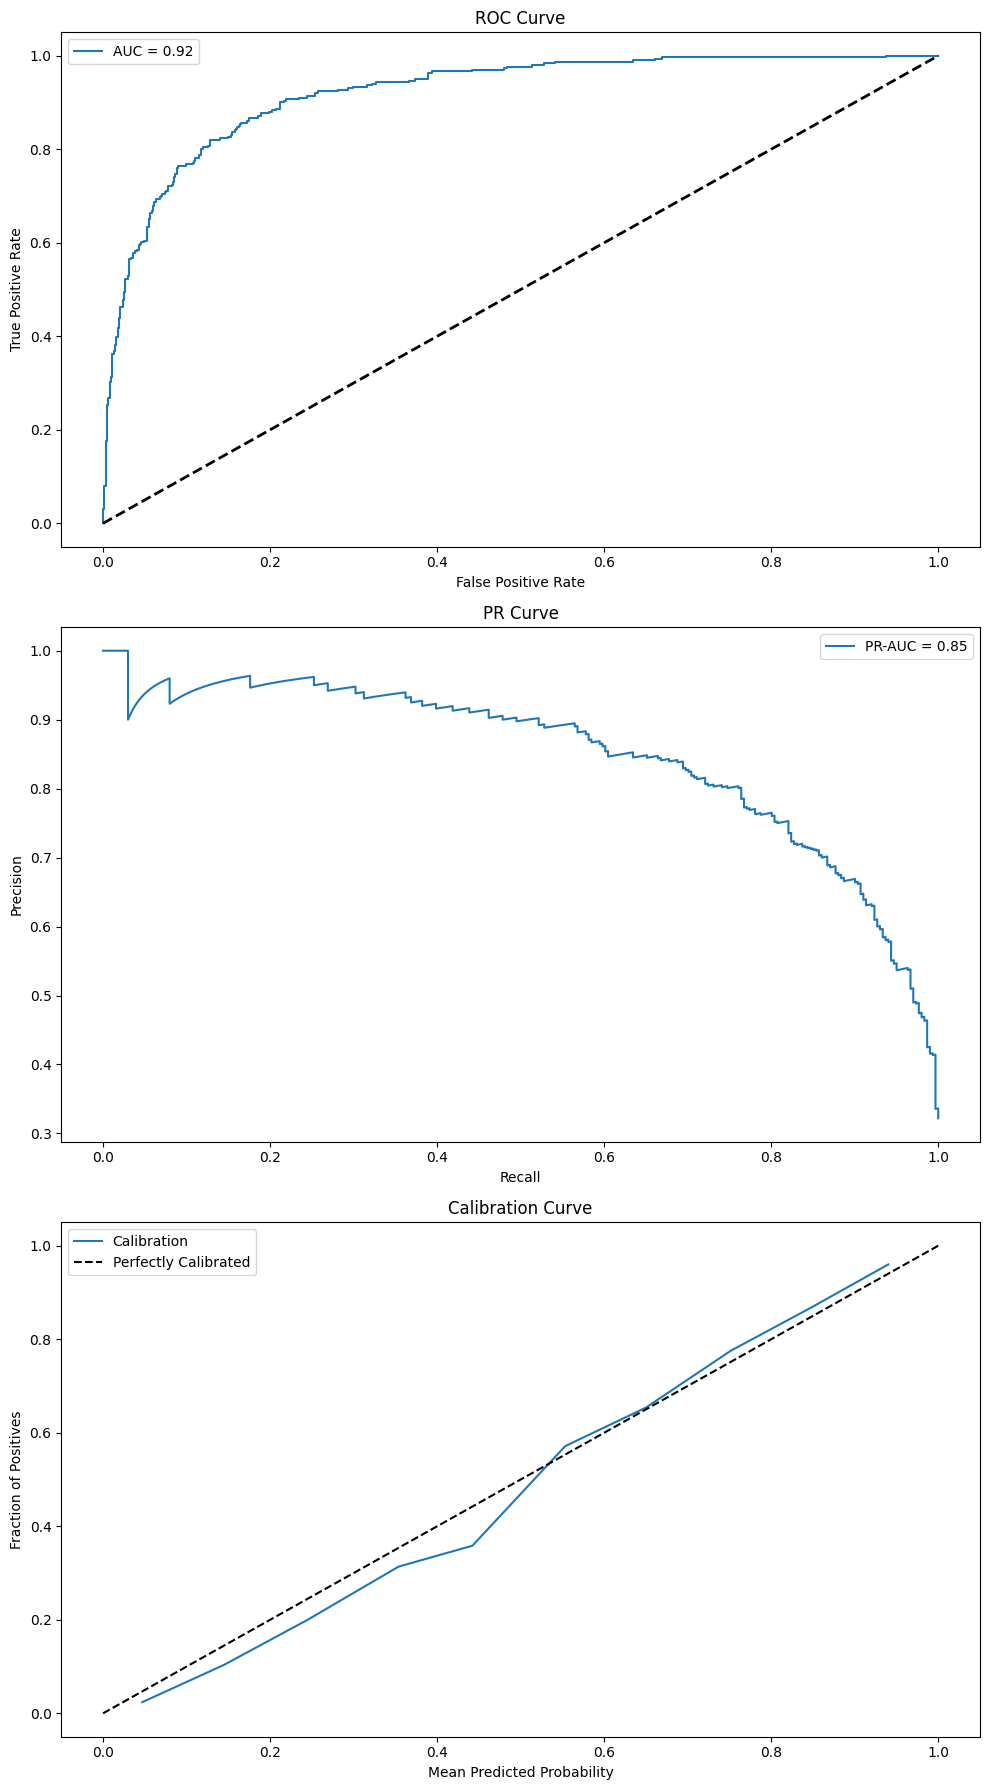

Specificity : 0.9101
Sensitivity : 0.7608
Accuracy : 0.8620
Precision : 0.8007
F1 score : 0.7802
Of 634 people who did not have a prolonged LOS, 577 (91.01%) were correctly classified.
Of 301 people who did have a prolonged LOS, 229 (76.08%) were correctly classified.
summary_first_rfd_to_discharge_hrs
summary_first_rfd_day_Mon
summary_first_edd_to_discharge_hrs
thro_door_to_admit_order_hrs
thro_admit_order_to_ed_dept_hrs
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
viz_drg_Rare
viz_drg_Esophagitis, gastroent & misc digest disorders w/o mcc
viz_age
img_avg_admit_order_to_imaging_order_any_hrs
thro_ed_arrival_time_Afternoon
viz_drg_Cellulitis w/o mcc
summary_last_edd_doc_to_discharge_hrs
viz_admission_day_Sun
viz_drg_Respiratory infections & inflammations w mcc
viz_ynhhs_sg2_service_Cardiology - Medical
summary_first_rfd_status_na
thro_admit_or_obs_order_day_Fri
rfd_first_nmr_to_discharge_hrs_na
census_daily_ed_count
viz_ynhhs_sg2_service_Infectious Disease - Medical
viz_d

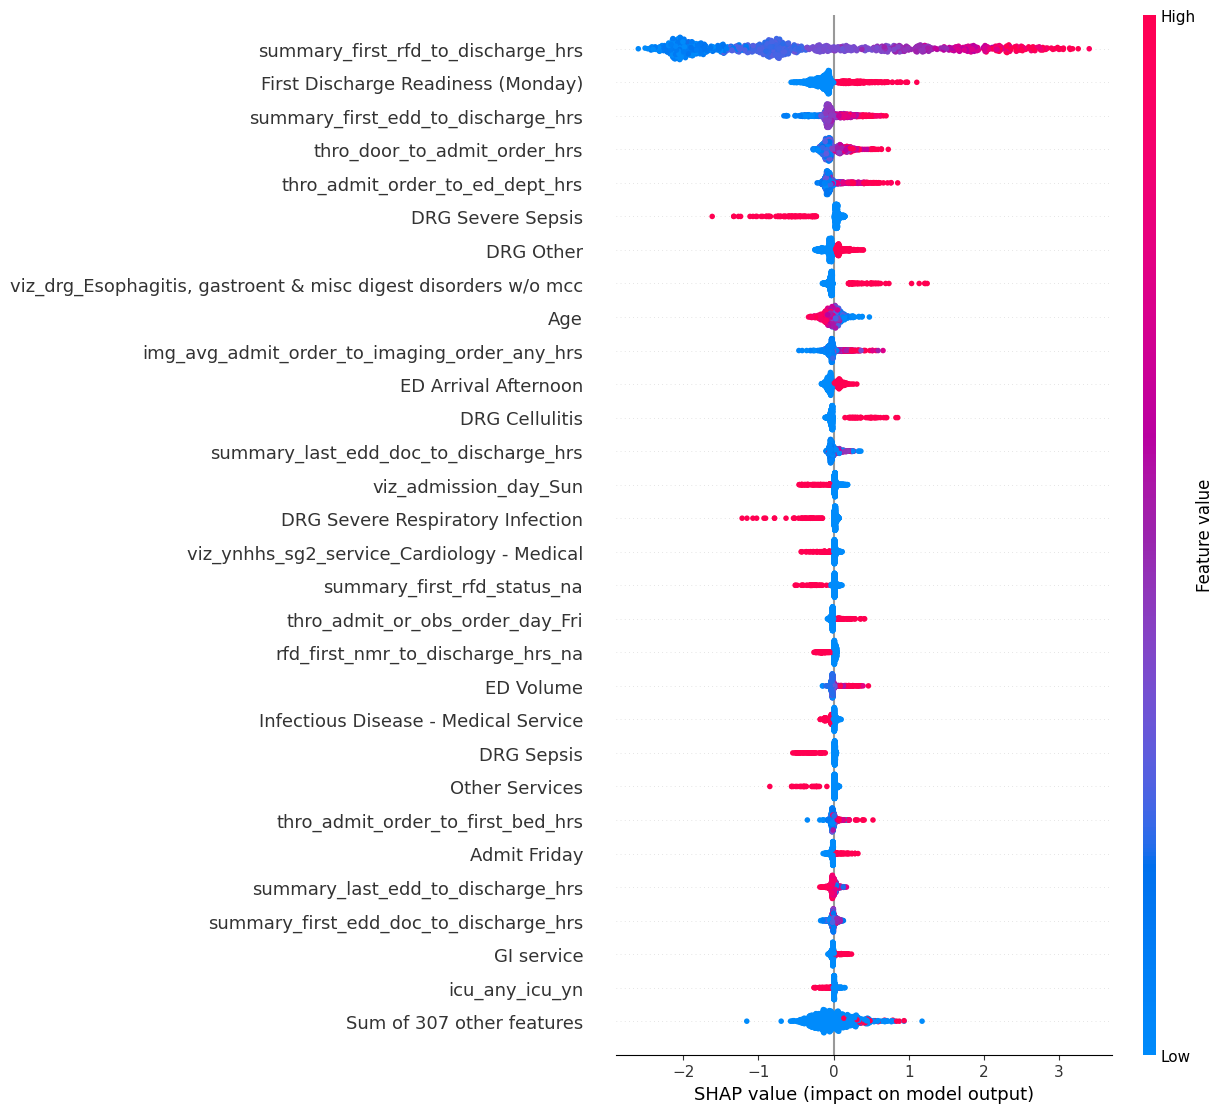

Plots for df_home_continuous_2024-08-15 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_hf
df_filt shape: (1351, 912)
X train_preprocessed shape: (1091, 729)
X val preprocessed shape: (260, 729)
y train prolonged LOS proportion: 0.44912923923006415
y val prolonged LOS proportion: 0.4576923076923077
X_train_selected shape: (1091, 292)
X_val_selected shape: (260, 292)
100%|██████████| 20/20 [00:13<00:00,  1.49trial/s, best loss: -0.8790788216112893]
XGB Best parameters for 292 features: {'colsample_by_tree': 0.6098851658750725, 'learning_rate': 0.12756984422442919, 'max_depth': 8, 'n_estimators': 20, 'num_leaves': 19, 'reg_lambda': 0.4078503245770707}


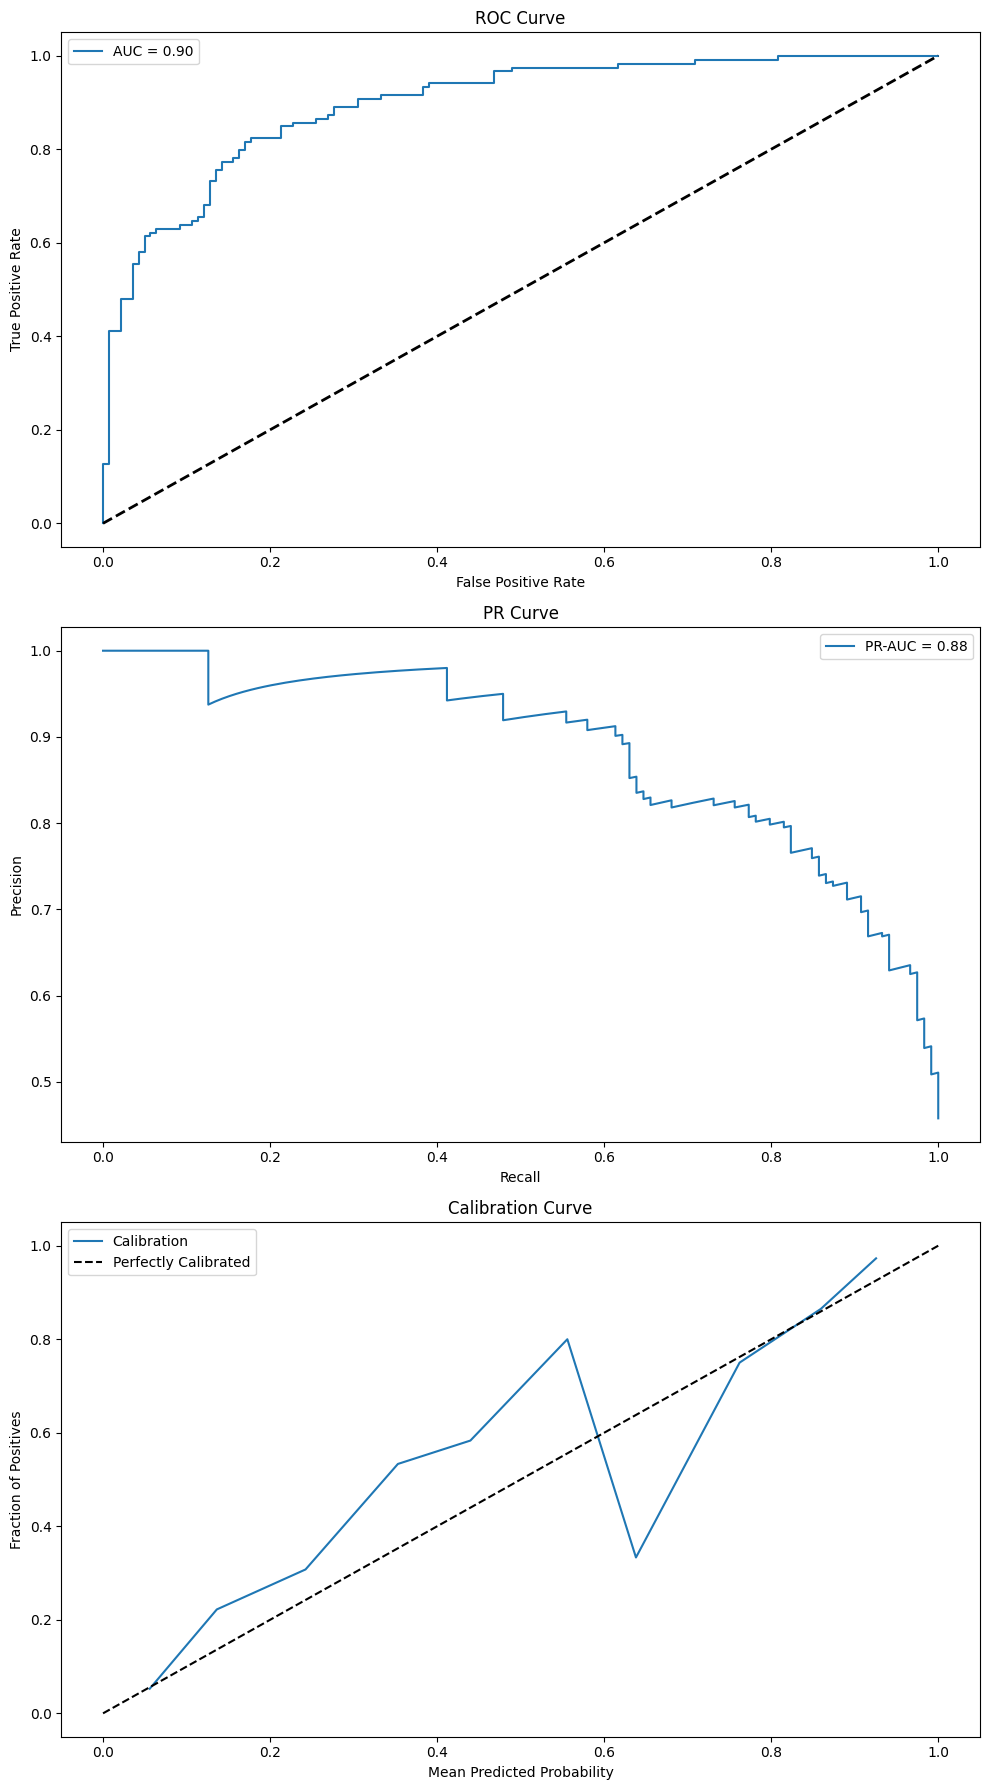

Specificity : 0.8723
Sensitivity : 0.7227
Accuracy : 0.8038
Precision : 0.8269
F1 score : 0.7713
Of 141 people who did not have a prolonged LOS, 123 (87.23%) were correctly classified.
Of 119 people who did have a prolonged LOS, 86 (72.27%) were correctly classified.
rfd_first_nmr_to_discharge_hrs
summary_total_hrs_nmr
thro_door_to_admit_order_hrs
thro_last_bed_to_ed_dept_hrs
con_avg_admit_order_to_consult_order_any_hrs
img_avg_admit_order_to_imaging_read_us_hrs
img_max_admit_order_to_imaging_read_any_hrs
summary_first_edd_to_discharge_hrs
img_max_order_to_completion_ct_hrs
viz_age
img_max_admit_order_to_imaging_order_us_hrs
census_daily_ed_count
img_avg_admit_order_to_imaging_order_any_hrs
viz_disp_collapsed_Home
con_avg_admit_order_to_consult_completion_any_hrs
thro_admit_order_to_ed_dept_hrs
summary_last_edd_doc_to_discharge_hrs
summary_last_rfd_to_discharge_hrs
con_max_consult_order_to_sign_any_hrs
summary_last_edd_to_discharge_hrs
img_avg_order_to_read_ct_hrs
summary_consult_count

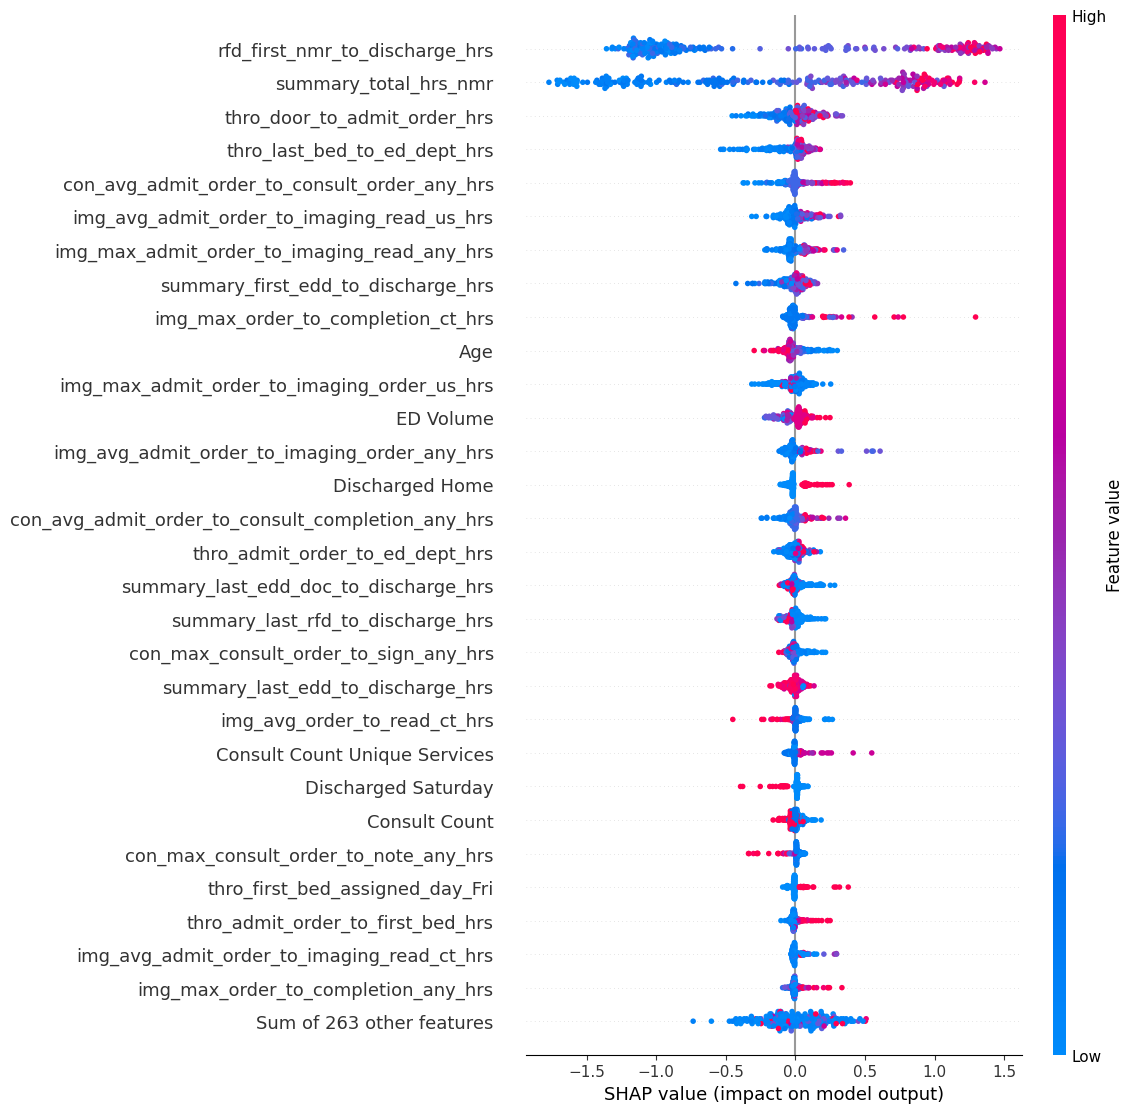

Plots for df_hf_continuous_2024-08-15 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output


In [7]:
# Run the function for each data frame and save the plots
for df_name, df_filt in dfs.items():
    print(f"Running on {df_name}")
    run_xgb_continuous_and_plot(df_filt, fp_continuous, output_folder, df_name, suffix="continuous")